In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data_path = "/content/drive/MyDrive/Dicoding/Capstone/datacleaning.csv"
df = pd.read_csv(data_path)

In [ ]:
df

,artist_name,music_name,music_id,release_date,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key
0,Adele,Easy On Me,0gplL1WMoJ6iYaPgMCL0gX,2021-10-14,100,0.57800,0.604,224694,0.366,0.000000,0.1330,0.130,-7.519,0.0282,141.981,5
1,Rosalía,LA FAMA (with The Weeknd),6dmXZ9B5HdFAyzHeTneYBK,2021-11-11,85,0.94600,0.770,188102,0.302,0.000034,0.1250,0.821,-7.911,0.0466,136.010,0
2,DojaCat,Woman,6Uj1ctrBOjOas8xZXGqKk4,2021-06-25,95,0.08880,0.824,172626,0.764,0.002940,0.1170,0.881,-4.175,0.0854,107.998,5
3,Adele,Oh My God,3Kkjo3cT83cw09VJyrLNwX,2021-11-19,83,0.09100,0.534,225148,0.725,0.000000,0.0264,0.550,-3.906,0.0460,88.098,1
4,TravisScott,ESCAPE PLAN,4R67rQNSbbsR4TdUVOIdez,2021-11-05,87,0.00207,0.839,149610,0.506,0.000000,0.1300,0.440,-6.714,0.1330,154.120,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26710,Legado7 JuniorH,Ojos De Maniaco,52Cpyvd2dKb6XRn313nH87,2020-02-28,68,0.21000,0.795,218501,0.585,0.000001,0.1120,0.934,-4.451,0.0374,97.479,8
26711,LeonBridges TerraceMartin,Sweeter (feat. Terrace Martin),1ehhGlTvjtHo2e4xJFB0SZ,2020-06-08,64,0.01670,0.719,167468,0.385,0.031300,0.1110,0.270,-10.907,0.0403,128.000,8
26712,Kygo OhWonder,How Would I Know,52eycxprLhK3lPcRLbQiVk,2020-05-29,70,0.53800,0.514,180700,0.539,0.002330,0.1080,0.153,-9.332,0.1050,123.700,7
26713,CashCash AndyGrammer,I Found You,3wYOGJYD31sLRmBgCvWxa4,2020-02-28,70,0.07140,0.646,167308,0.761,0.000000,0.2220,0.472,-2.557,0.0385,129.916,1


In [ ]:
continuous_features = df.select_dtypes(include='float').columns.to_list()
continuous_features

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'valence',
 'loudness',
 'speechiness',
 'tempo']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[continuous_features])
df[continuous_features] = scaler.transform(df.loc[:, continuous_features])
df[continuous_features].head(5)

,acousticness,danceability,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo
0,0.581488,0.583559,0.362017,0.000000,0.244444,0.130908,0.680053,0.051891,0.647779
1,0.951710,0.763583,0.297514,0.000156,0.228283,0.826786,0.665117,0.213720,0.610895
2,0.089335,0.822145,0.763150,0.013611,0.212121,0.887209,0.807468,0.554969,0.437861
3,0.091548,0.507646,0.723843,0.000000,0.029091,0.553873,0.817718,0.208443,0.314936
4,0.002081,0.838412,0.503119,0.000000,0.238384,0.443096,0.710726,0.973615,0.722763


In [ ]:
df

,artist_name,music_name,music_id,release_date,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key
0,Adele,Easy On Me,0gplL1WMoJ6iYaPgMCL0gX,2021-10-14,100,0.581488,0.583559,224694,0.362017,0.000000,0.244444,0.130908,0.680053,0.051891,0.647779,5
1,Rosalía,LA FAMA (with The Weeknd),6dmXZ9B5HdFAyzHeTneYBK,2021-11-11,85,0.951710,0.763583,188102,0.297514,0.000156,0.228283,0.826786,0.665117,0.213720,0.610895,0
2,DojaCat,Woman,6Uj1ctrBOjOas8xZXGqKk4,2021-06-25,95,0.089335,0.822145,172626,0.763150,0.013611,0.212121,0.887209,0.807468,0.554969,0.437861,5
3,Adele,Oh My God,3Kkjo3cT83cw09VJyrLNwX,2021-11-19,83,0.091548,0.507646,225148,0.723843,0.000000,0.029091,0.553873,0.817718,0.208443,0.314936,1
4,TravisScott,ESCAPE PLAN,4R67rQNSbbsR4TdUVOIdez,2021-11-05,87,0.002081,0.838412,149610,0.503119,0.000000,0.238384,0.443096,0.710726,0.973615,0.722763,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26710,Legado7 JuniorH,Ojos De Maniaco,52Cpyvd2dKb6XRn313nH87,2020-02-28,68,0.211266,0.790695,218501,0.582741,0.000006,0.202020,0.940583,0.796952,0.132806,0.372884,8
26711,LeonBridges TerraceMartin,Sweeter (feat. Terrace Martin),1ehhGlTvjtHo2e4xJFB0SZ,2020-06-08,64,0.016799,0.708275,167468,0.381167,0.144907,0.200000,0.271896,0.550962,0.158311,0.561416,8
26712,Kygo OhWonder,How Would I Know,52eycxprLhK3lPcRLbQiVk,2020-05-29,70,0.541247,0.485956,180700,0.536379,0.010787,0.193939,0.154070,0.610974,0.727353,0.534855,7
26713,CashCash AndyGrammer,I Found You,3wYOGJYD31sLRmBgCvWxa4,2020-02-28,70,0.071830,0.629107,167308,0.760127,0.000000,0.424242,0.475322,0.869118,0.142480,0.573252,1


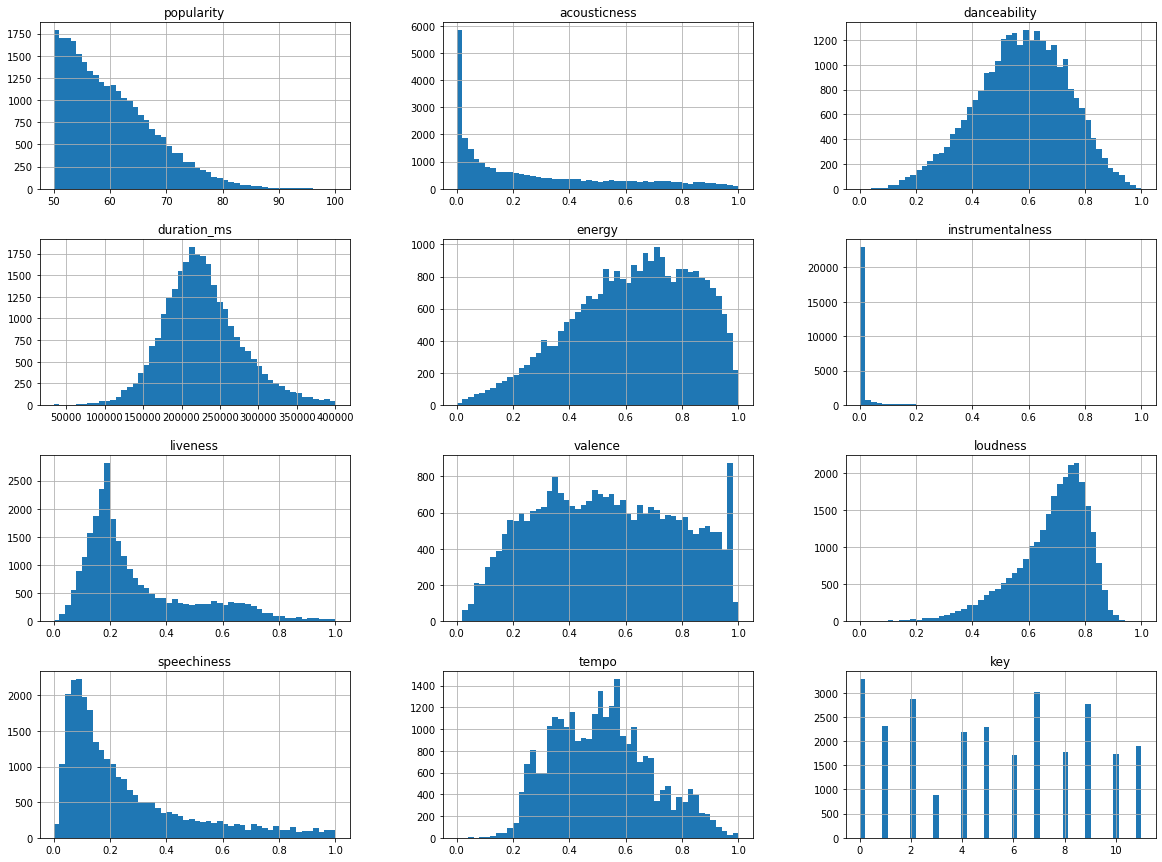

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

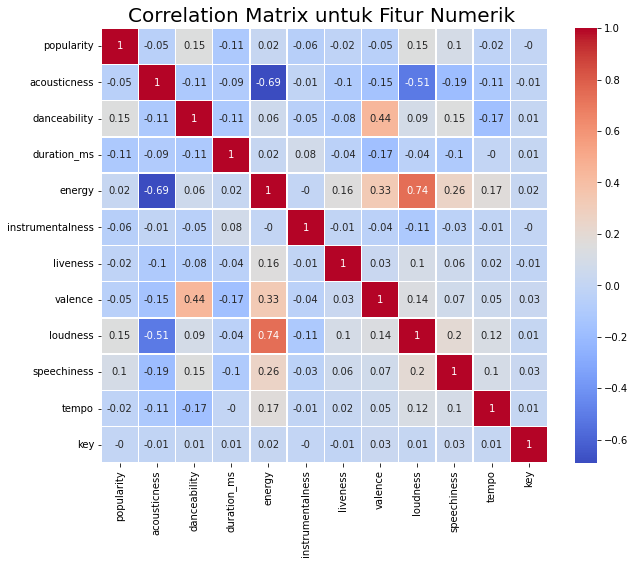

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline


col_features = ['energy', 'valence']
X = df[col_features]
kmeans = KMeans(init="k-means++",
                n_clusters=4,
                random_state=15).fit(X)

df['moods'] = kmeans.labels_

In [ ]:
df

,artist_name,music_name,music_id,release_date,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,moods
0,Adele,Easy On Me,0gplL1WMoJ6iYaPgMCL0gX,2021-10-14,100,0.581488,0.583559,224694,0.362017,0.000000,0.244444,0.130908,0.680053,0.051891,0.647779,5,0
1,Rosalía,LA FAMA (with The Weeknd),6dmXZ9B5HdFAyzHeTneYBK,2021-11-11,85,0.951710,0.763583,188102,0.297514,0.000156,0.228283,0.826786,0.665117,0.213720,0.610895,0,3
2,DojaCat,Woman,6Uj1ctrBOjOas8xZXGqKk4,2021-06-25,95,0.089335,0.822145,172626,0.763150,0.013611,0.212121,0.887209,0.807468,0.554969,0.437861,5,1
3,Adele,Oh My God,3Kkjo3cT83cw09VJyrLNwX,2021-11-19,83,0.091548,0.507646,225148,0.723843,0.000000,0.029091,0.553873,0.817718,0.208443,0.314936,1,2
4,TravisScott,ESCAPE PLAN,4R67rQNSbbsR4TdUVOIdez,2021-11-05,87,0.002081,0.838412,149610,0.503119,0.000000,0.238384,0.443096,0.710726,0.973615,0.722763,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26710,Legado7 JuniorH,Ojos De Maniaco,52Cpyvd2dKb6XRn313nH87,2020-02-28,68,0.211266,0.790695,218501,0.582741,0.000006,0.202020,0.940583,0.796952,0.132806,0.372884,8,3
26711,LeonBridges TerraceMartin,Sweeter (feat. Terrace Martin),1ehhGlTvjtHo2e4xJFB0SZ,2020-06-08,64,0.016799,0.708275,167468,0.381167,0.144907,0.200000,0.271896,0.550962,0.158311,0.561416,8,0
26712,Kygo OhWonder,How Would I Know,52eycxprLhK3lPcRLbQiVk,2020-05-29,70,0.541247,0.485956,180700,0.536379,0.010787,0.193939,0.154070,0.610974,0.727353,0.534855,7,0
26713,CashCash AndyGrammer,I Found You,3wYOGJYD31sLRmBgCvWxa4,2020-02-28,70,0.071830,0.629107,167308,0.760127,0.000000,0.424242,0.475322,0.869118,0.142480,0.573252,1,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


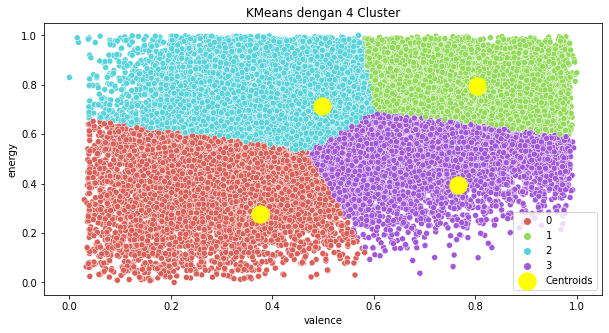

In [ ]:
# membuat plot KMeans dengan 4 klaster
plt.figure(figsize=(10,5))
sns.scatterplot(df['valence'], df['energy'], hue=df['moods'],
                palette=sns.color_palette('hls', 4))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.title('KMeans dengan 4 Cluster')
plt.show()

In [ ]:
df = df.replace({'moods' : { 0 : 'Happy', 2 : 'Anxious', 1 : 'Sad', 3 : 'Relaxed' }})

In [ ]:
df.head()

,artist_name,music_name,music_id,release_date,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,moods
0,Adele,Easy On Me,0gplL1WMoJ6iYaPgMCL0gX,2021-10-14,100,0.581488,0.583559,224694,0.362017,0.000000,0.244444,0.130908,0.680053,0.051891,0.647779,5,Happy
1,Rosalía,LA FAMA (with The Weeknd),6dmXZ9B5HdFAyzHeTneYBK,2021-11-11,85,0.951710,0.763583,188102,0.297514,0.000156,0.228283,0.826786,0.665117,0.213720,0.610895,0,Relaxed
2,DojaCat,Woman,6Uj1ctrBOjOas8xZXGqKk4,2021-06-25,95,0.089335,0.822145,172626,0.763150,0.013611,0.212121,0.887209,0.807468,0.554969,0.437861,5,Sad
3,Adele,Oh My God,3Kkjo3cT83cw09VJyrLNwX,2021-11-19,83,0.091548,0.507646,225148,0.723843,0.000000,0.029091,0.553873,0.817718,0.208443,0.314936,1,Anxious
4,TravisScott,ESCAPE PLAN,4R67rQNSbbsR4TdUVOIdez,2021-11-05,87,0.002081,0.838412,149610,0.503119,0.000000,0.238384,0.443096,0.710726,0.973615,0.722763,5,Happy


In [ ]:
df.groupby(['moods']).mean()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key
moods,,,,,,,,,,,,
Anxious,60.360842,0.110541,0.525921,234260.138448,0.765163,0.033985,0.319685,0.393574,0.753472,0.298756,0.535298,5.194498
Happy,59.773059,0.508441,0.505197,234108.358904,0.376133,0.035758,0.262000,0.275689,0.576960,0.174451,0.486298,5.079909
Relaxed,59.202946,0.363770,0.651802,216845.783665,0.497212,0.028870,0.277394,0.712945,0.614158,0.236616,0.496676,5.228577
Sad,59.568023,0.155089,0.634314,221506.746306,0.803095,0.030743,0.315504,0.794708,0.741278,0.281199,0.536185,5.381656


In [ ]:
def create_gabungan(x):
    return x['moods'] + ' ' + x['artist_name']
df['gabungan'] = df.apply(create_gabungan, axis=1)

In [ ]:
df_cbf = pd.DataFrame({
    'artist_name': df['artist_name'],
    'music_name': df['music_name'],
    'music_id': df['music_id'],
    'moods': df['moods'],
    'gabungan': df['gabungan']
})
df_cbf

,artist_name,music_name,music_id,moods,gabungan
0,Adele,Easy On Me,0gplL1WMoJ6iYaPgMCL0gX,Happy,Adele Happy
1,Rosalía,LA FAMA (with The Weeknd),6dmXZ9B5HdFAyzHeTneYBK,Relaxed,Rosalía Relaxed
2,DojaCat,Woman,6Uj1ctrBOjOas8xZXGqKk4,Sad,DojaCat Sad
3,Adele,Oh My God,3Kkjo3cT83cw09VJyrLNwX,Anxious,Adele Anxious
4,TravisScott,ESCAPE PLAN,4R67rQNSbbsR4TdUVOIdez,Happy,TravisScott Happy
...,...,...,...,...,...
26710,Legado7 JuniorH,Ojos De Maniaco,52Cpyvd2dKb6XRn313nH87,Relaxed,Legado7 JuniorH Relaxed
26711,LeonBridges TerraceMartin,Sweeter (feat. Terrace Martin),1ehhGlTvjtHo2e4xJFB0SZ,Happy,LeonBridges TerraceMartin Happy
26712,Kygo OhWonder,How Would I Know,52eycxprLhK3lPcRLbQiVk,Happy,Kygo OhWonder Happy
26713,CashCash AndyGrammer,I Found You,3wYOGJYD31sLRmBgCvWxa4,Anxious,CashCash AndyGrammer Anxious


In [ ]:
# df.to_csv("/content/drive/MyDrive/Dicoding/Capstone/clustering.csv", index=False)

In [ ]:
df_cbf.to_csv("/content/drive/MyDrive/Dicoding/Capstone/CBF.csv", index=False)